## <font color='blue'>Projeto 6 - Previsão de Vendas de E-Commerce</font>

Usaremos como fonte de dados o dataset: Online Shoppers Purchasing Intention Dataset
https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

O conjunto de dados consiste em valores de recursos pertencentes a 12.330 sessões online. O conjunto de dados foi formado de modo que cada sessão pertença a um usuário diferente em um período de 1 ano para evitar qualquer tendência para uma campanha específica, dia especial, usuário, perfil ou período.

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos. O atributo 'Revenue' pode ser usado como o rótulo da classe, ou seja, nossa variável ALVO

### Dicionário de dados: Descrição a que se refere cada variável do conjunto de dados


"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra. 

Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico. 

O valor do recurso "Taxa de rejeição" de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("rejeição") sem acionar outras solicitações ao servidor durante essa sessão. 

O valor do recurso "Taxa de saída" para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página. 

O recurso "Valor da página" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico. 

O recurso "Dia especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro. 

O conjunto de dados também inclui o tipo de sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.

### 1º Passo - Definição do Problema de Negócio / Objetivo

Avaliar quais são os 3 atributos que mais influenciam um usuário na compra de produtos online e construir um modelo preditivo para realizar previsões de compras futuras.

O responsável pela solicitação do projeto solicitou uma tabela demonstrativa com no mínimo 3 tipos de testes de modelos para corroborar nosso trabalho.

### 2º Passo - Coleta de Dados e Importação dos Pacotes
<p> Vamos coletar os dados que serão utilizados e importar os pacotes que iremos utilizar

In [5]:
# Importando as bibliotecas que iremos utilizar...
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm


from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from category_encoders.one_hot import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import sklearn
import matplotlib
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [6]:
# Carregando os dados
df_original = pd.read_csv('online_shoppers_intention.csv')

### 3º Passo - Analise Exploratória / Analise de Dados
<p> Vamos realizar diversas analises em nossos dados para identificar insights e situações que deverão ser tratadas.

In [8]:
# Visualizando as primeiras linhas do arquivo
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
# Shape dos dados
df_original.shape

(12330, 18)

In [10]:
# Verificando os tipos de dados
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [11]:
# Verificando valores missing/nulos
df_original.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [12]:
# Removendo as linhas com valores missing
# Como temos bem poucos valores nulos, vamos remove-los direto
df_original.dropna(inplace = True)
df_original.reset_index(drop=True, inplace=True)

In [13]:
# Verificando valores missing
df_original.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [14]:
# Verificando as dimensões dos nossos dados
df_original.shape

(12316, 18)

In [15]:
# Verificando Valores Únicos
df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [16]:
# Dividiremos os dados em variáveis contínuas e categóricas. 
# Trataremos todas as variáveis com menos de 30 entradas únicas como categóricas.

# Cria uma cópia do dataset original
df = df_original.copy()

# Listas vazias para os resultados
variaveis_continuas = []
variaveis_categoricas = []

# Faz um Loop pelas colunas
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        variaveis_continuas.append(c)
    else:
        variaveis_categoricas.append(c)

- Variáveis Categóricas: Representam categorias, rótulos ou grupos distintos.
- Variáveis Contínuas: Representam medidas reais ou quantitativas, com muitos valores possíveis.

In [18]:
variaveis_continuas

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [19]:
# Variáveis contínuas
df[variaveis_continuas].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [20]:
# Variáveis categóricas
df[variaveis_categoricas].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


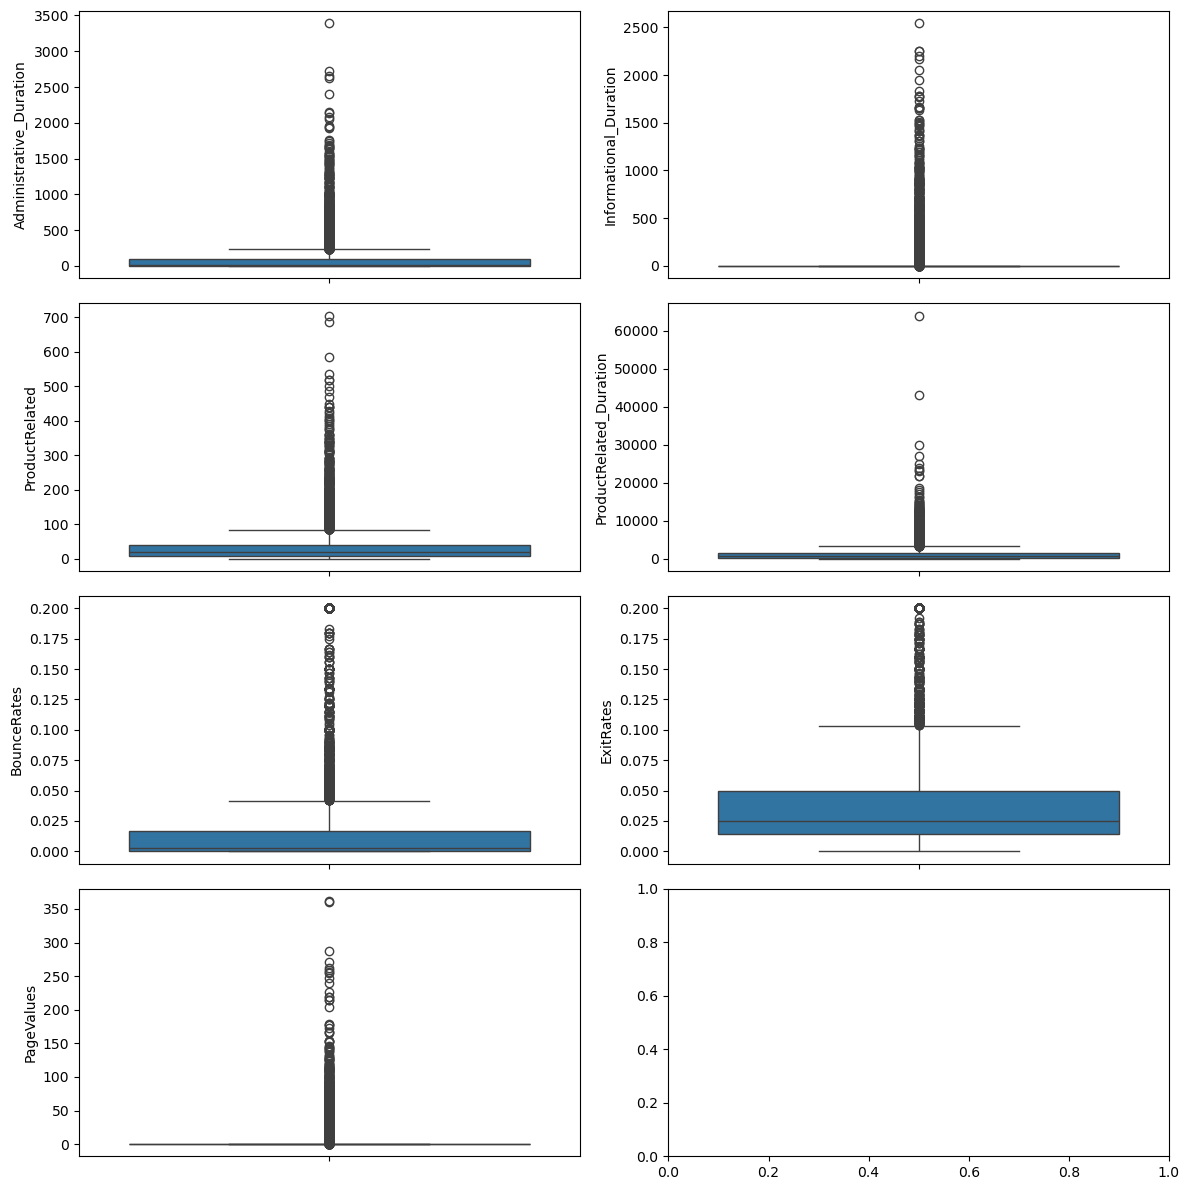

In [21]:
# Gerando os BoxPlots para analise das variaveis continuas
plt.rcParams["figure.figsize"] = [12.00, 12.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_continuas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.savefig('boxplot.png')
plt.show()

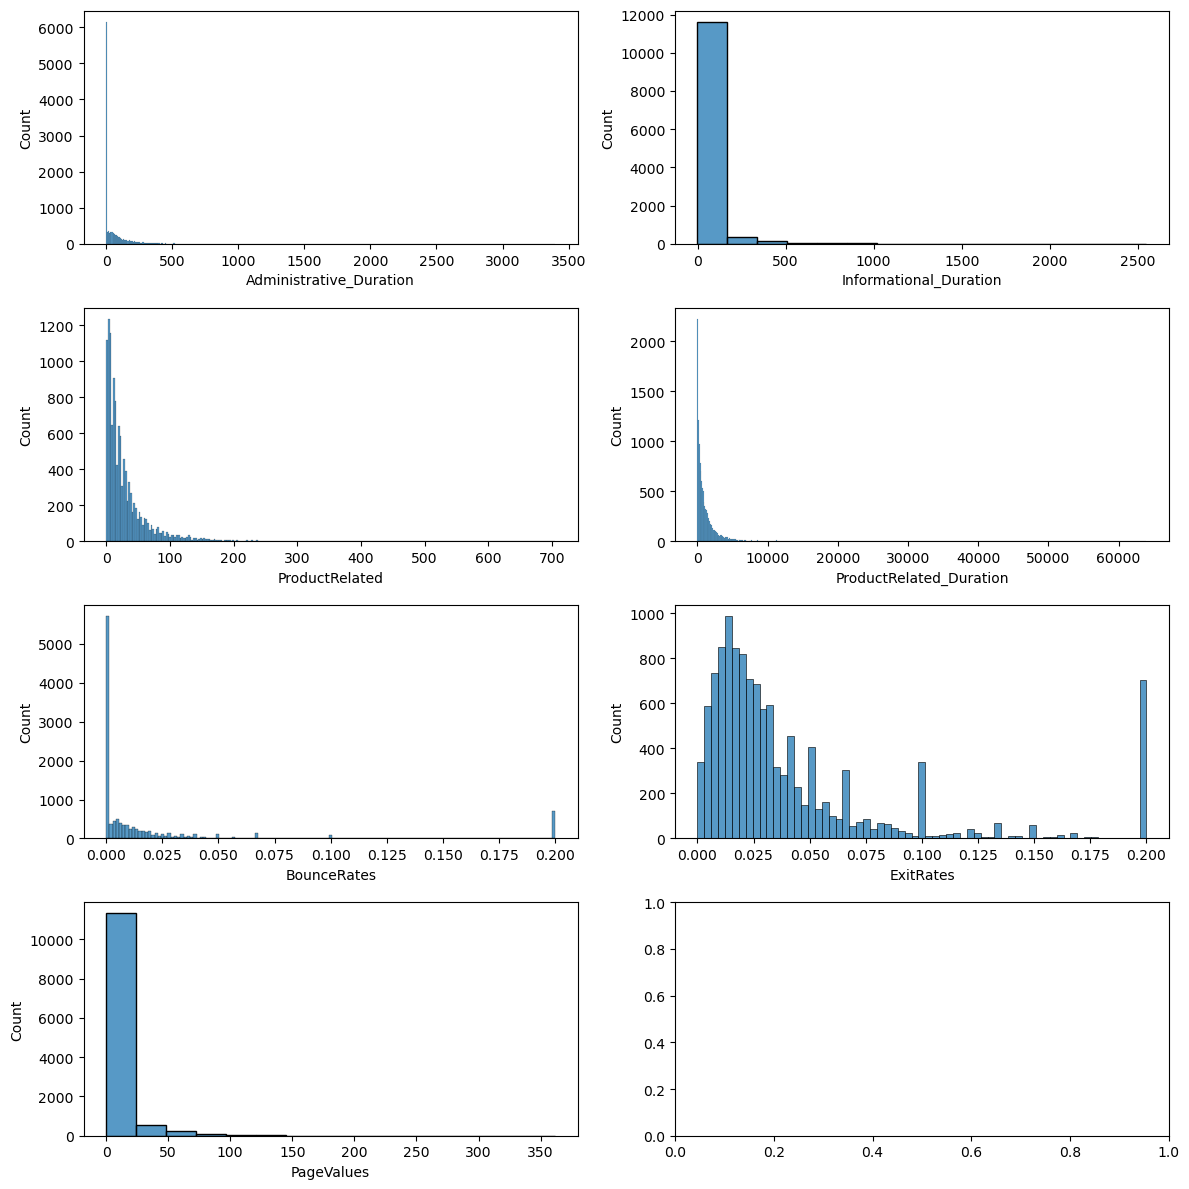

In [22]:
# Gerando o Histograma das variaveis continuas
plt.rcParams["figure.figsize"] = [12.00, 12.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_continuas:
    sns.histplot(data = df, x=i, ax=axes[linha][coluna])
    
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.savefig('histplot.png')
plt.show()

In [23]:
# 1. Aplicar QuantileTransformer nas colunas numéricas
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df[variaveis_continuas] = qt.fit_transform(df[variaveis_continuas])

# Visualiza o DataFrame com as colunas transformadas
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,-0.703922,0.0,-0.243255,-1.918441,-1.858747,5.199338,5.199338,-5.199338,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,-0.703922,0.0,-0.243255,-1.467860,-1.116369,-5.199338,1.261282,-5.199338,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-5.199338,0.0,-5.199338,-1.918441,-5.199338,5.199338,5.199338,-5.199338,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,-0.703922,0.0,-0.243255,-1.467860,-1.546460,1.225943,1.482760,-5.199338,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,-0.703922,0.0,-0.243255,-0.457033,0.018246,0.774833,0.708752,-5.199338,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,-0.703922,0.0,-0.243255,0.043924,-0.765345,0.639462,-0.051138,-5.199338,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-5.199338,0.0,-5.199338,-1.918441,-5.199338,5.199338,5.199338,-5.199338,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-5.199338,0.0,-5.199338,-1.918441,-5.199338,5.199338,5.199338,-5.199338,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,-0.703922,0.0,-0.243255,-1.467860,-1.274676,-5.199338,1.261282,-5.199338,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,-0.703922,0.0,-0.243255,-1.233962,0.139031,-5.199338,-0.158740,-5.199338,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


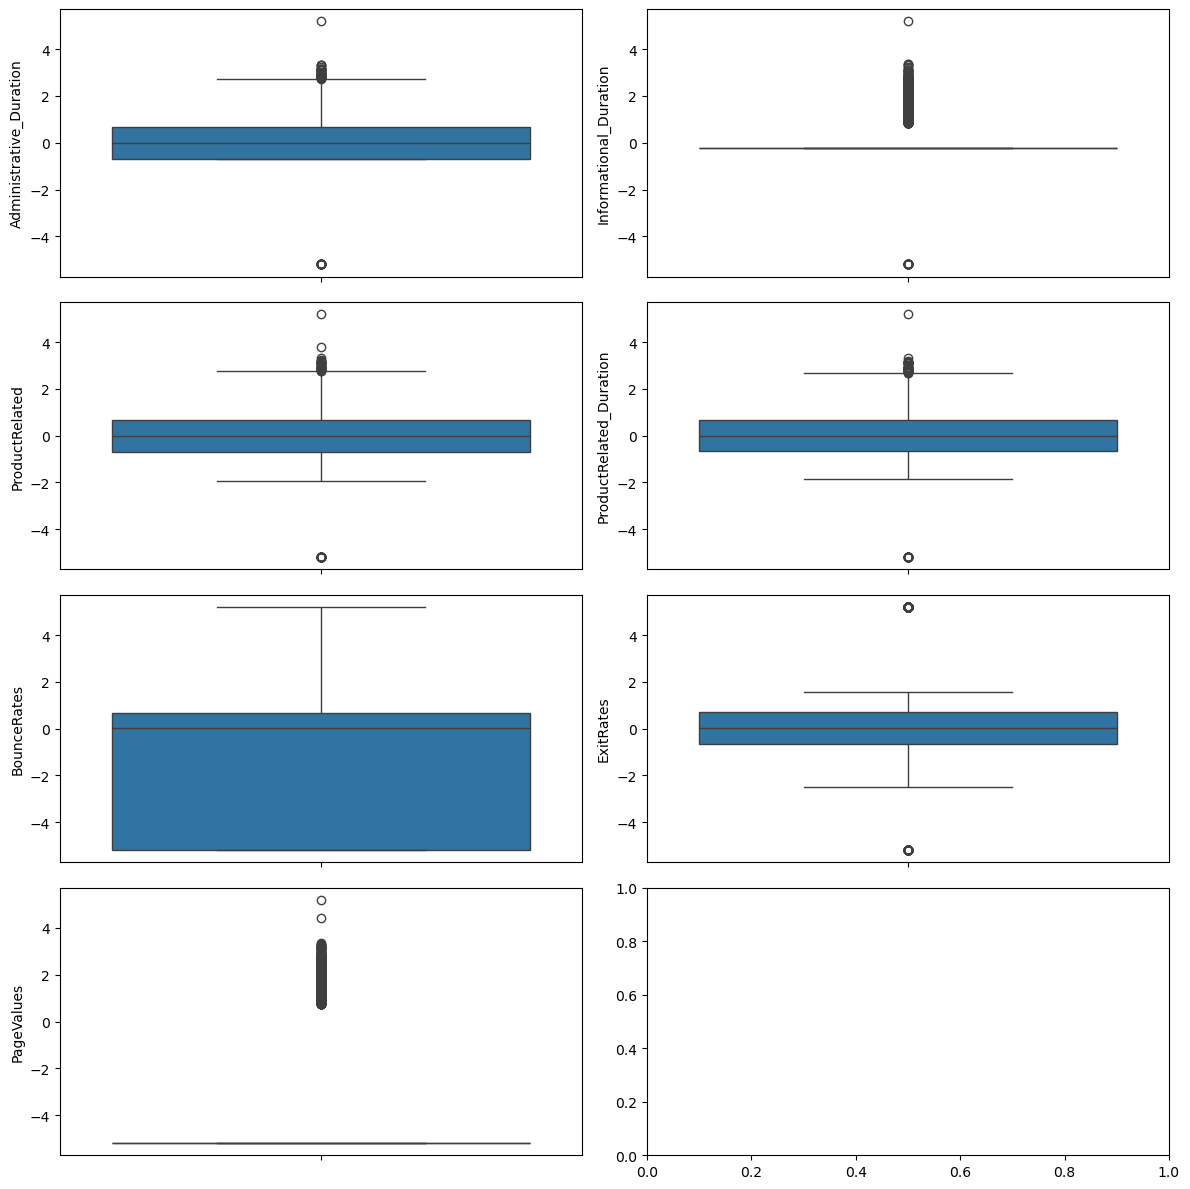

In [24]:
# Gerando os boxplots após o QuantileTransformer
plt.rcParams["figure.figsize"] = [12.00, 12.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_continuas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.savefig('boxplot.png')
plt.show()

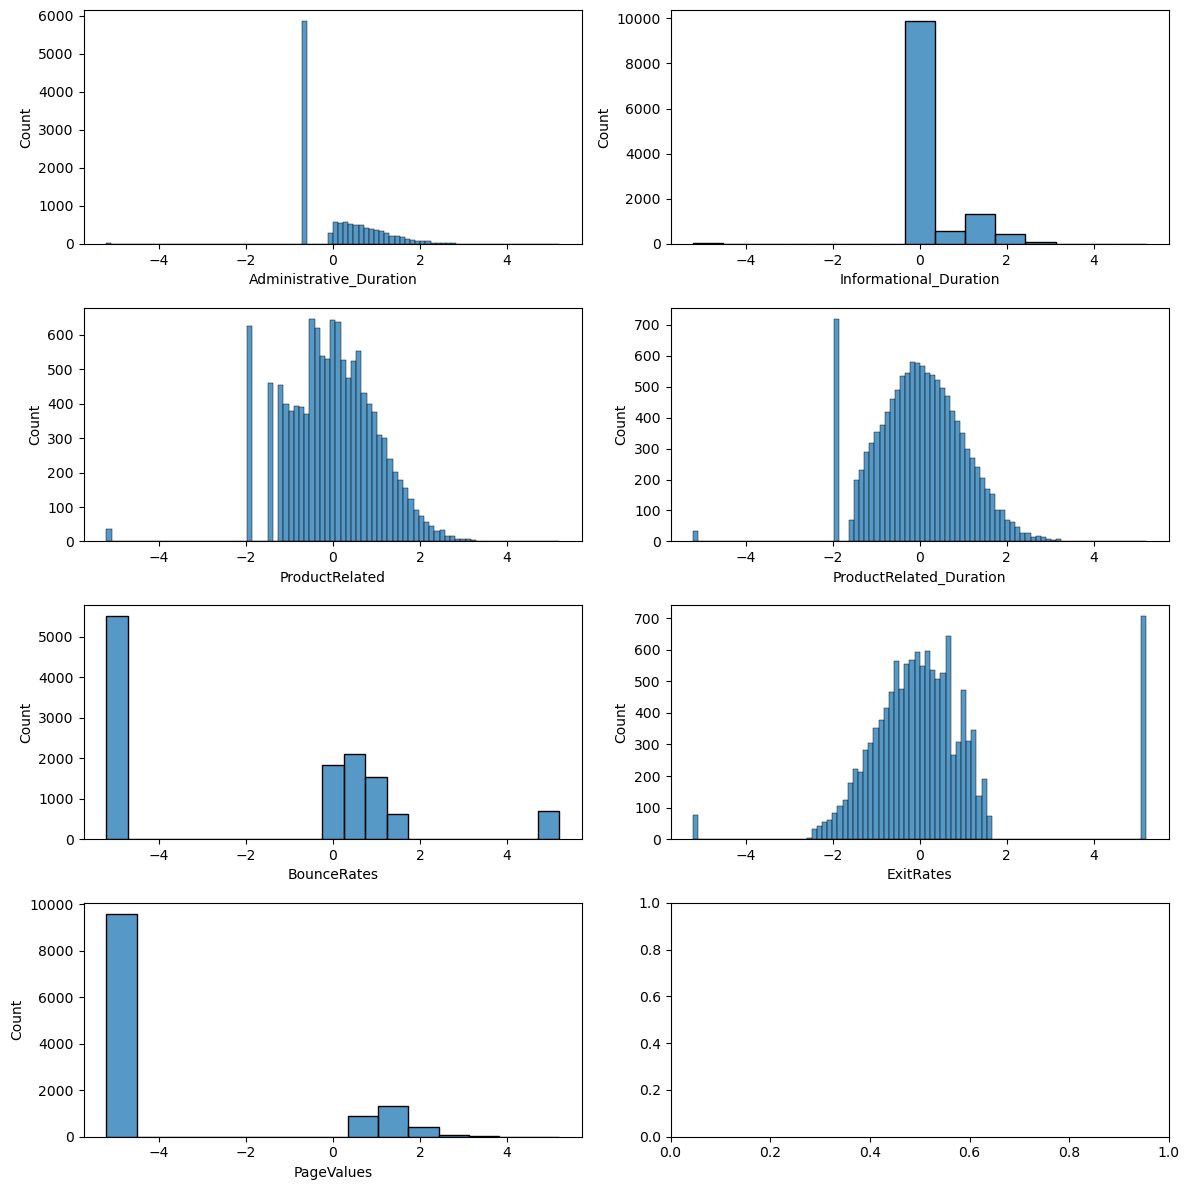

In [25]:
# Gerando o histograma após o QuantileTransformer
plt.rcParams["figure.figsize"] = [12.00, 12.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_continuas:
    sns.histplot(data = df, x=i, ax=axes[linha][coluna])
    
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.savefig('histplot.png')
plt.show()

In [26]:
# Deixando o tamanho dos plots menores
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True

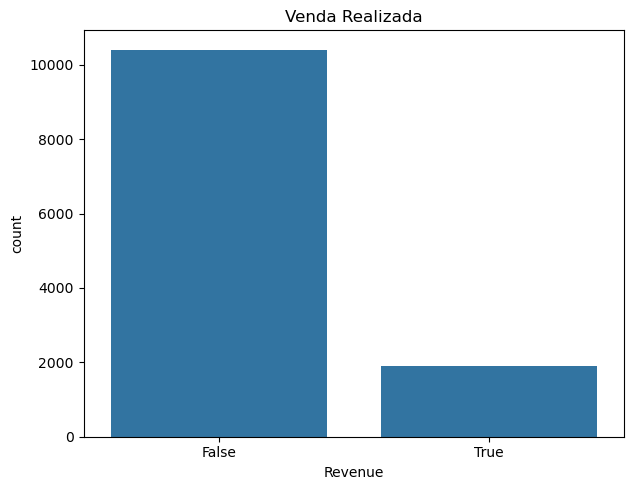

In [27]:
# Countplot Venda ou Não
plt.subplot(1, 2, 2)
plt.title("Venda Realizada")
sns.countplot(x=df['Revenue'])  # ou y=df['Revenue'] se quiser barras horizontais
plt.show()

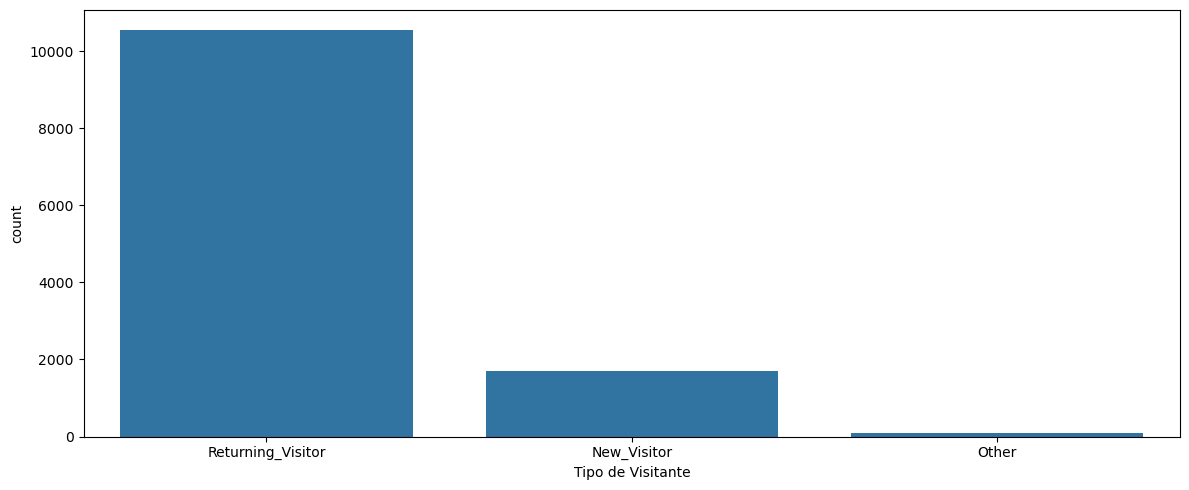

In [28]:
# Countplot Tipo de Visitante
plt.xlabel("Tipo de Visitante")
sns.countplot(x = df['VisitorType']) # ou y=df['Revenue'] se quiser barras horizontais
plt.show()

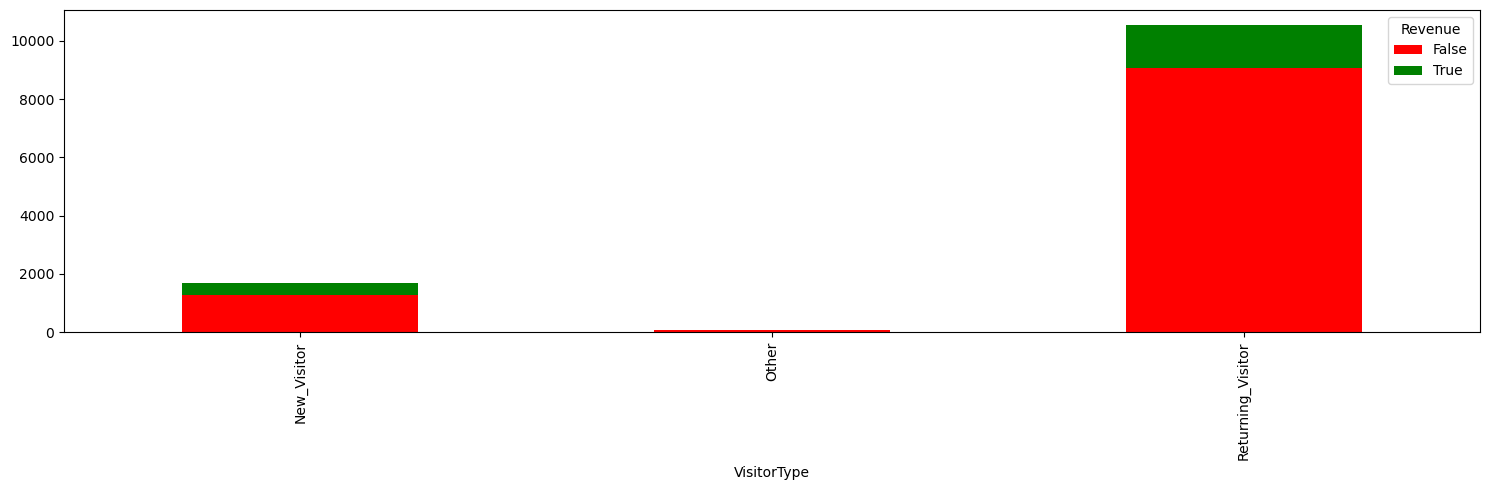

In [29]:
# Stacked Bar Tipo de Visitante x Revenue
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])
plt.show()

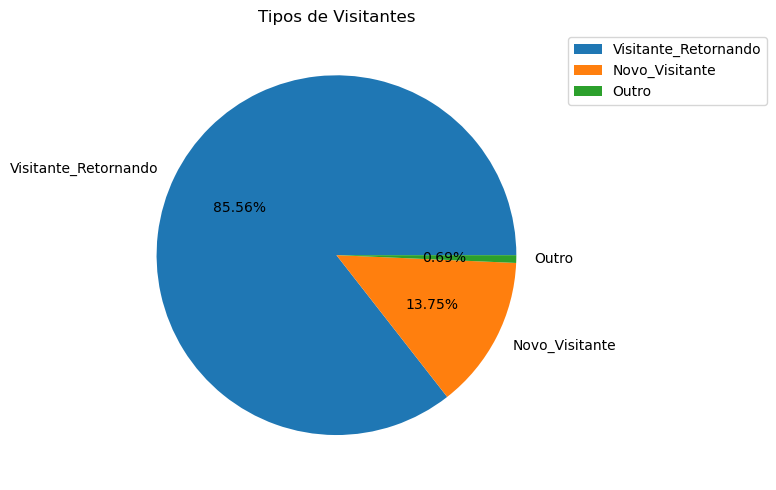

In [30]:
# Gráfico de Pizza de Tipos de Visitantes
labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title("Tipos de Visitantes")
plt.pie(df['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

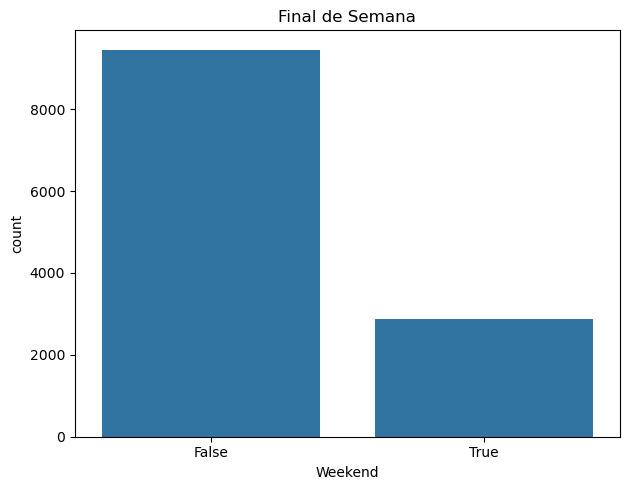

In [31]:
# Countplot Final de Semana ou Não
plt.subplot(1,2,1)
plt.title("Final de Semana")
sns.countplot(x = df['Weekend'])
plt.show()

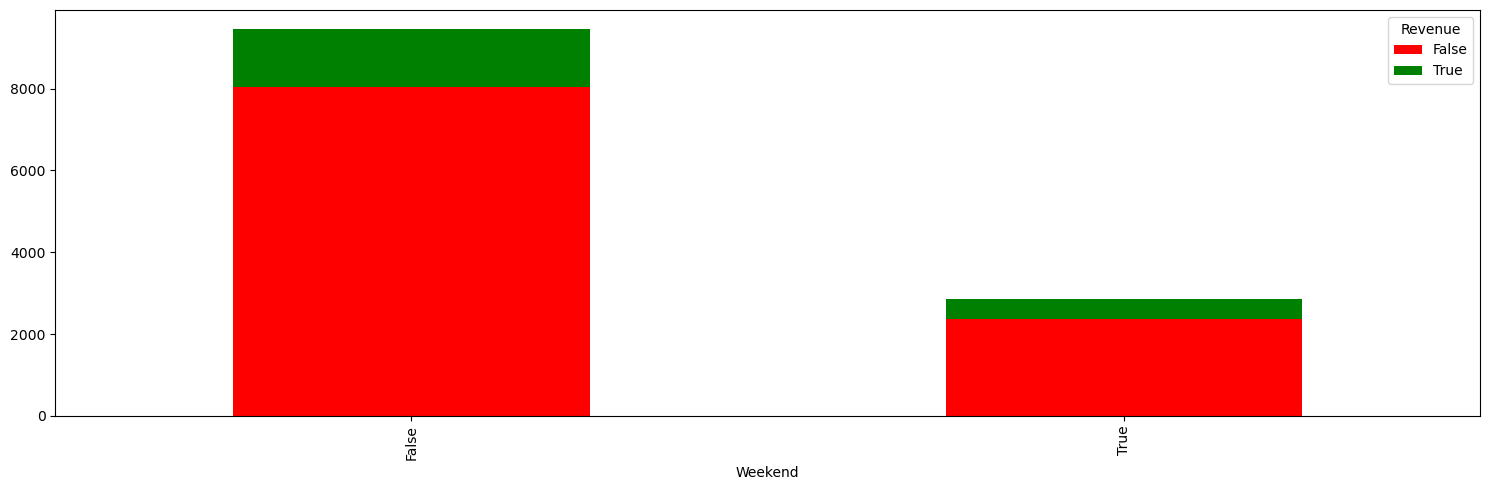

In [32]:
# Stacked Bar Final de Semana x Revenue
pd.crosstab(df['Weekend'], df['Revenue']).plot(kind = 'bar', 
                                               stacked = True, 
                                               figsize = (15, 5), 
                                               color = ['red', 'green'])
plt.show()

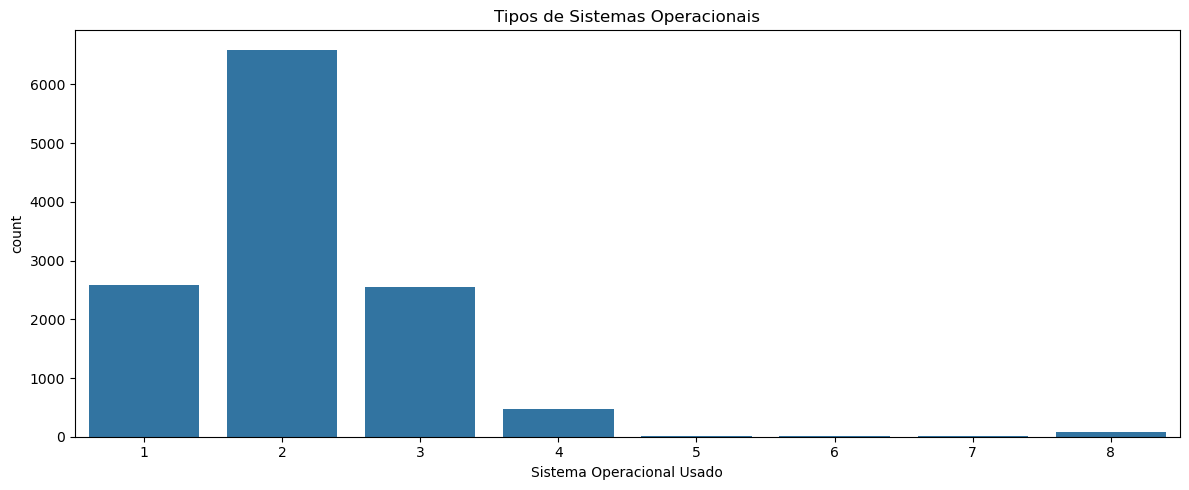

In [33]:
# Countplot Tipos de Sistemas Operacionais
#plt.figure(figsize = (15,6))
plt.title("Tipos de Sistemas Operacionais")
plt.xlabel("Sistema Operacional Usado")
sns.countplot(x = df['OperatingSystems'])
plt.show()

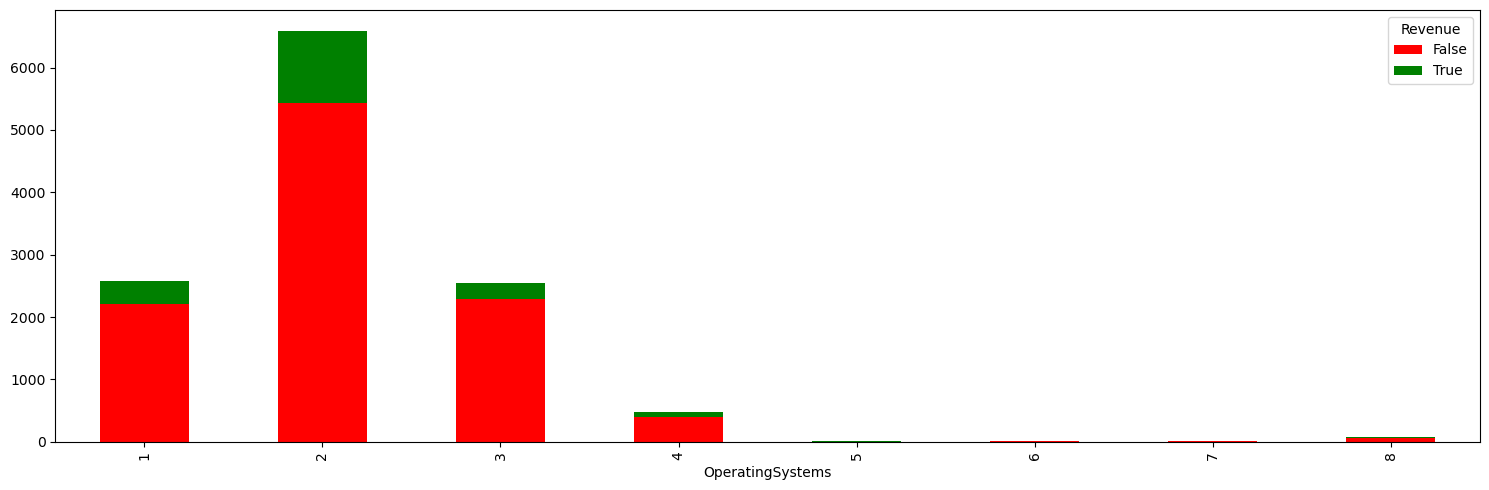

In [34]:
# Stacked Bar Tipo de SO x Revenue
pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind = 'bar', 
                                                        stacked = True, 
                                                        figsize = (15, 5), 
                                                        color = ['red', 'green'])
plt.show()

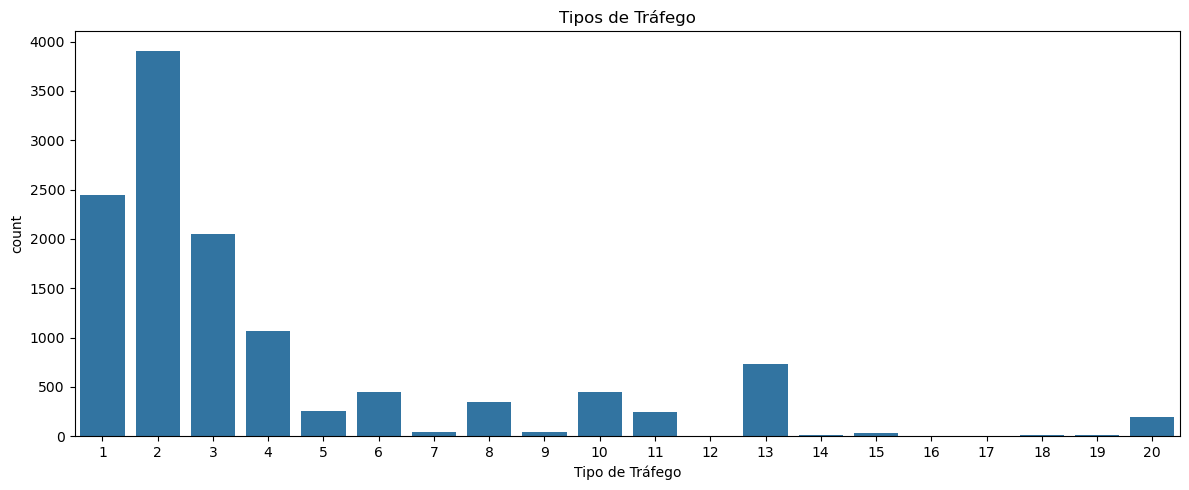

In [35]:
# Countplot Tipo de Tráfego
plt.title("Tipos de Tráfego")
plt.xlabel("Tipo de Tráfego")
sns.countplot(x = df['TrafficType'])
plt.show()

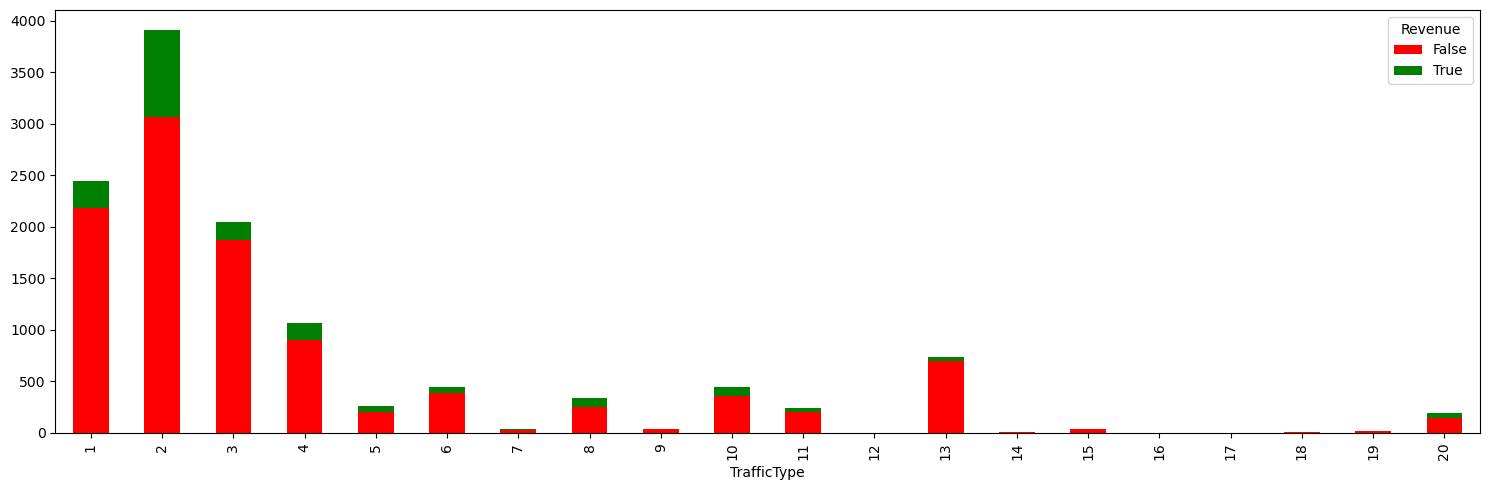

In [36]:
# Stacked Bar Tipos de Tráfego x Revenue
pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])
plt.show()

In [37]:
# Vamos visualizar novamente nosso DataFrame antes de fazer alguns outros tratamentos
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,-0.703922,0.0,-0.243255,-1.918441,-1.858747,5.199338,5.199338,-5.199338,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,-0.703922,0.0,-0.243255,-1.467860,-1.116369,-5.199338,1.261282,-5.199338,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-5.199338,0.0,-5.199338,-1.918441,-5.199338,5.199338,5.199338,-5.199338,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,-0.703922,0.0,-0.243255,-1.467860,-1.546460,1.225943,1.482760,-5.199338,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,-0.703922,0.0,-0.243255,-0.457033,0.018246,0.774833,0.708752,-5.199338,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [38]:
# Visualizando valores nulos
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [39]:
# Carregando as variaveis categoricas ordinais (OrdinalEncoding)
variaveis_categoricas_ordinais = ['Month']

# Realizando o ordinal encoder das variaveis categoricas ordinais
encoder = OrdinalEncoder()
for var in variaveis_categoricas_ordinais:
    df[var] = encoder.fit_transform(df[var])

In [40]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,-0.703922,0.0,-0.243255,-1.918441,-1.858747,5.199338,5.199338,-5.199338,0.0,1,1,1,1,1,Returning_Visitor,False,False
1,0.0,-0.703922,0.0,-0.243255,-1.467860,-1.116369,-5.199338,1.261282,-5.199338,0.0,1,2,2,1,2,Returning_Visitor,False,False
2,0.0,-5.199338,0.0,-5.199338,-1.918441,-5.199338,5.199338,5.199338,-5.199338,0.0,1,4,1,9,3,Returning_Visitor,False,False
3,0.0,-0.703922,0.0,-0.243255,-1.467860,-1.546460,1.225943,1.482760,-5.199338,0.0,1,3,2,2,4,Returning_Visitor,False,False
4,0.0,-0.703922,0.0,-0.243255,-0.457033,0.018246,0.774833,0.708752,-5.199338,0.0,1,3,3,1,4,Returning_Visitor,True,False


In [41]:
# Carregando as variaveis categoricas nominais
variaveis_categoricas_nominais = ['VisitorType','Weekend']
variaveis_categoricas_nominais

['VisitorType', 'Weekend']

In [42]:
# One Hot Encoder das variaveis categoricas nominais
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[variaveis_categoricas_nominais])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(variaveis_categoricas_nominais))
df = pd.concat([df, one_hot_df], axis=1)
df = df.drop(variaveis_categoricas_nominais, axis=1)

In [43]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0.0,-0.703922,0.0,-0.243255,-1.918441,-1.858747,5.199338,5.199338,-5.199338,0.0,...,1,1,1,1,False,0.0,0.0,1.0,1.0,0.0
1,0.0,-0.703922,0.0,-0.243255,-1.467860,-1.116369,-5.199338,1.261282,-5.199338,0.0,...,2,2,1,2,False,0.0,0.0,1.0,1.0,0.0
2,0.0,-5.199338,0.0,-5.199338,-1.918441,-5.199338,5.199338,5.199338,-5.199338,0.0,...,4,1,9,3,False,0.0,0.0,1.0,1.0,0.0
3,0.0,-0.703922,0.0,-0.243255,-1.467860,-1.546460,1.225943,1.482760,-5.199338,0.0,...,3,2,2,4,False,0.0,0.0,1.0,1.0,0.0
4,0.0,-0.703922,0.0,-0.243255,-0.457033,0.018246,0.774833,0.708752,-5.199338,0.0,...,3,3,1,4,False,0.0,0.0,1.0,0.0,1.0


In [44]:
# Verificando as dimensoes do conjunto de dados
df.shape

(12316, 21)

In [45]:
# Verificando valores nulos
df.isnull().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
Month                            0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
Revenue                          0
VisitorType_New_Visitor          0
VisitorType_Other                0
VisitorType_Returning_Visitor    0
Weekend_False                    0
Weekend_True                     0
dtype: int64

In [46]:
# Verificando se a variável resposta está balanceada
target_count = df.Revenue.value_counts()
target_count

Revenue
False    10408
True      1908
Name: count, dtype: int64

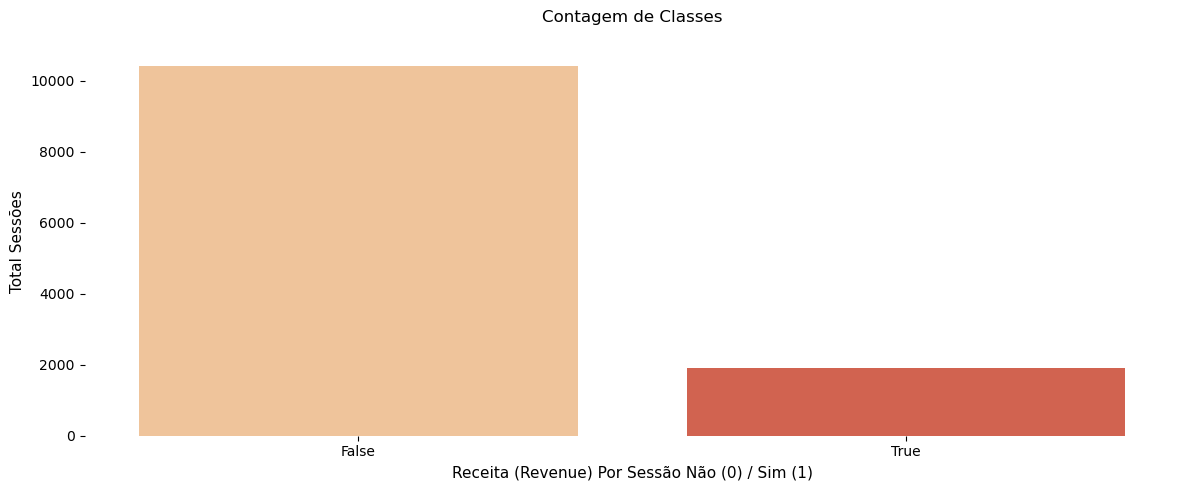

In [47]:
# Grafico para visualizar o balanceamento da variável alvo 
sns.countplot(x = df['Revenue'], palette = "OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [48]:
# Verificando os tipos de variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12316 non-null  float64
 1   Administrative_Duration        12316 non-null  float64
 2   Informational                  12316 non-null  float64
 3   Informational_Duration         12316 non-null  float64
 4   ProductRelated                 12316 non-null  float64
 5   ProductRelated_Duration        12316 non-null  float64
 6   BounceRates                    12316 non-null  float64
 7   ExitRates                      12316 non-null  float64
 8   PageValues                     12316 non-null  float64
 9   SpecialDay                     12316 non-null  float64
 10  Month                          12316 non-null  int32  
 11  OperatingSystems               12316 non-null  int64  
 12  Browser                        12316 non-null 

In [49]:
# Separação das variaveis preditoras e variavel alvo
PREDITORAS = df.drop(['Revenue'], axis = 1)
TARGET = df['Revenue'].copy()

In [50]:
# Precisamos balancear a variavel alvo...

# Criando o objeto do balanceador
balanceador = SMOTE(random_state=42)

# Aplicando o balanceador nas variáveis
PREDITORAS_BAL, TARGET_BAL = balanceador.fit_resample(PREDITORAS, TARGET)

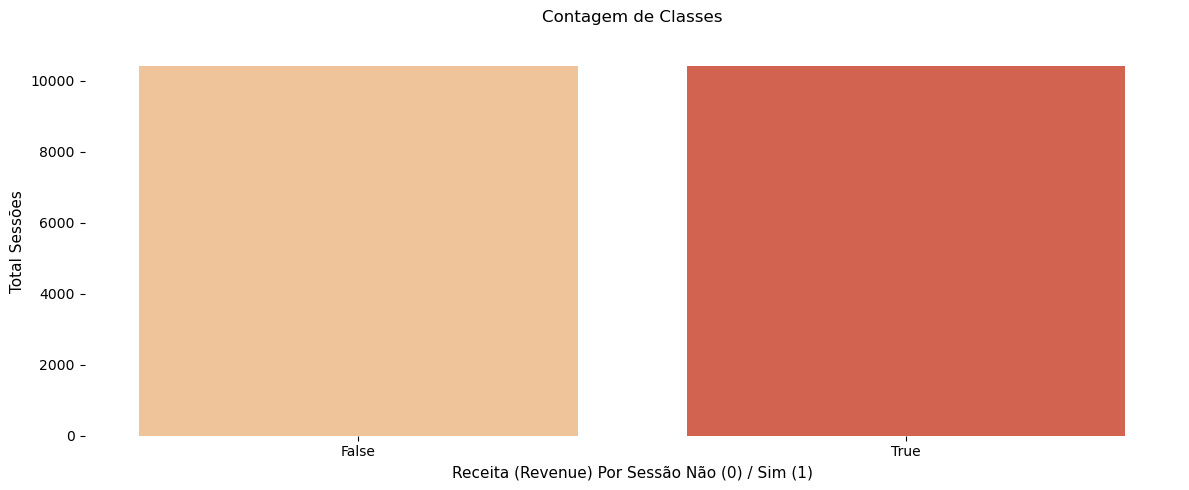

In [51]:
# Visualizando o balanceamento da variavel alvo
sns.countplot(x = TARGET_BAL, palette = "OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [52]:
# Shape dos dados (preditoras) balanceados 
PREDITORAS_BAL.shape

(20816, 20)

In [53]:
# Shape dos dados (target) balanceados
TARGET_BAL.shape

(20816,)

In [54]:
# Agora vamos separar os dados em Dados de Treino e Dados de Teste
# Utilizaremos 30% para dados de teste e 70% para dados de treino

X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS_BAL, TARGET_BAL, test_size = 0.3, random_state = 42)

In [55]:
# Cria o modelo
modelo_v1 = svm.SVC(kernel = 'linear')

In [56]:
# Vamos fazer o treinameneto do modelo, inicialmente sem realizar a padronização dos dados
start = time.time()
modelo_v1.fit(X_treino, Y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 134.1275134086609


In [57]:
# Gerando as previsões do Modelo V1
previsoes_v1 = modelo_v1.predict(X_teste)

In [58]:
# Dicionário de métricas e metadados
SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v1, Y_teste),
               'Recall':recall_score(previsoes_v1, Y_teste),
               'F1 Score':f1_score(previsoes_v1, Y_teste),
               'Acurácia':accuracy_score(previsoes_v1, Y_teste),
               'AUC':roc_auc_score(Y_teste, previsoes_v1)}

In [59]:
# Visualizando as Métricas
print("Métricas em Teste:\n")
SVM_dict_v1

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear',
 'Precision': 0.8054499366286438,
 'Recall': 0.8735395189003436,
 'F1 Score': 0.8381140784701615,
 'Acurácia': 0.8427542033626901,
 'AUC': 0.8431587656597411}

In [60]:
# Vamos aplicar a padronização em treino e teste
sc = StandardScaler()
X_treino_padronizados = sc.fit_transform(X_treino)
X_teste_padronizados = sc.transform(X_teste)

### Obsevação:

Para impedir que as informações sobre a distribuição do conjunto de teste vazem em seu modelo, o ideal é aplicar a padronização em separado nos dados de treino e de teste, ajustando o redimensionador apenas aos dados de treinamento, padronizando então os conjuntos de treinamento e teste com esse redimensionador (exatamente como está na célula acima). Ao ajustar o redimensionador no conjunto de dados completo antes da divisão em treino e teste, informações sobre o conjunto de testes são usadas para transformar o conjunto de treinamento.

Sempre aplique a padronização depois de fazer a divisão em treino e teste, exatamente como fizemos aqui. Usamos fit_transform() nos dados de treino e transform() nos dados de teste quando usamos o StandardScaler().

In [62]:
# Visualizando os dados de treino padronizados
X_treino_padronizados

array([[ 0.65598349,  0.59562567, -0.44925434, ...,  0.49032996,
         0.58943107, -0.58943107],
       [ 2.94938714,  1.57070374,  1.52544175, ...,  0.49032996,
        -1.55624264,  1.55624264],
       [ 0.65577456,  0.85333106,  1.06538926, ...,  0.49032996,
         0.58943107, -0.58943107],
       ...,
       [-0.20404288,  0.59967974,  1.82271106, ...,  0.49032996,
         0.58943107, -0.58943107],
       [-0.77739379, -0.99499678, -0.44925434, ..., -2.22180237,
         0.58943107, -0.58943107],
       [-0.77739379, -0.99499678, -0.44925434, ..., -2.22180237,
         0.58943107, -0.58943107]])

In [63]:
# Visualizando os dados de teste padronizados
X_teste_padronizados

array([[-0.77739379, -0.99499678, -0.44925434, ..., -2.22180237,
         0.58943107, -0.58943107],
       [-0.77739379, -0.99499678, -0.44925434, ...,  0.49032996,
        -1.8792508 ,  1.8792508 ],
       [-0.77739379, -0.99499678, -0.44925434, ...,  0.49032996,
        -1.8792508 ,  1.8792508 ],
       ...,
       [-0.77739379, -0.99499678, -0.44925434, ...,  0.49032996,
         0.58943107, -0.58943107],
       [-0.77739379, -0.99499678,  0.10303501, ...,  0.49032996,
         0.58943107, -0.58943107],
       [-0.77739379, -0.99499678, -0.44925434, ..., -2.22180237,
         0.58943107, -0.58943107]])

In [64]:
# Cria o modelo
modelo_v2 = svm.SVC(kernel = 'linear')

In [65]:
# Treinamento do modelo com os dados padronizados
start = time.time()
modelo_v2.fit(X_treino_padronizados, Y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 33.13929224014282


In [66]:
# Gerando as Previsões do Modelo V2
previsoes_v2 = modelo_v2.predict(X_teste_padronizados)

In [67]:
# Dicionário de métricas
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v2, Y_teste),
               'Recall':recall_score(previsoes_v2, Y_teste),
               'F1 Score':f1_score(previsoes_v2, Y_teste),
               'Acurácia':accuracy_score(previsoes_v2, Y_teste),
               'AUC':roc_auc_score(Y_teste, previsoes_v2)}

In [68]:
# Visualizando as métricas
print("Métricas em Teste:\n")
SVM_dict_v2

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.8054499366286438,
 'Recall': 0.8735395189003436,
 'F1 Score': 0.8381140784701615,
 'Acurácia': 0.8427542033626901,
 'AUC': 0.8431587656597411}

### Otimização de Hiperparâmetros com Grid Search e Kernel RBF

In [70]:
# Cria o modelo
modelo_v3 = svm.SVC(kernel = 'rbf')

# Valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3, svm_param_grid, cv = 3)

# Treinamento
modelo_v3_grid_search_rbf.fit(X_treino_padronizados, Y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v3_grid_search_rbf.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 76.21062850952148
Acurácia em Treinamento: 88.01%

Hiperparâmetros Ideais: {'C': 200.0, 'gamma': 0.003}


In [71]:
# Gerando as Previsões do Modelo V3
previsoes_v3 = modelo_v3_grid_search_rbf.predict(X_teste_padronizados)

In [72]:
# Dicionário de métricas e metadados
SVM_dict_v3 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'RBF com Dados Padronizados',
               'Precision':precision_score(previsoes_v3, Y_teste),
               'Recall':recall_score(previsoes_v3, Y_teste),
               'F1 Score':f1_score(previsoes_v3, Y_teste),
               'Acurácia':accuracy_score(previsoes_v3, Y_teste),
               'AUC':roc_auc_score(Y_teste, previsoes_v3)}

In [73]:
# Visualizando as Métricas
print("Métricas em Teste:\n")
SVM_dict_v3

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'RBF com Dados Padronizados',
 'Precision': 0.870722433460076,
 'Recall': 0.8870238863783085,
 'F1 Score': 0.8787975695554845,
 'Acurácia': 0.8786228983186549,
 'AUC': 0.8787085783357357}

### Otimização de Hiperparâmetros com Grid Search e Kernel Polinomial

In [75]:
# Cria o modelo
modelo_v4 = svm.SVC(kernel = 'poly')

# Valores para o grid
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Grid de hiperparâmetros
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
start = time.time()
modelo_v4_grid_search_poly = GridSearchCV(modelo_v4, param_grid_poly, cv = 3)

# Treinamento
modelo_v4_grid_search_poly.fit(X_treino_padronizados, Y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v4_grid_search_poly.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 58.251691579818726
Acurácia em Treinamento: 85.95%

Hiperparâmetros Ideais: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [76]:
# Gerando as previsões do Modelo V4
previsoes_v4 = modelo_v4_grid_search_poly.predict(X_teste_padronizados)

In [77]:
# Dicionário de métricas
SVM_dict_v4 = {'Modelo':'SVM',
               'Versão':'4',
               'Kernel':'Polinomial com Dados Padronizados',
               'Precision':precision_score(previsoes_v4, Y_teste),
               'Recall':recall_score(previsoes_v4, Y_teste),
               'F1 Score':f1_score(previsoes_v4, Y_teste),
               'Acurácia':accuracy_score(previsoes_v4, Y_teste),
               'AUC':roc_auc_score(Y_teste, previsoes_v4)}

In [78]:
# Visualizando as Métricas
print("Métricas em Teste:\n")
SVM_dict_v4

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.8472750316856781,
 'Recall': 0.8822170900692841,
 'F1 Score': 0.8643930822692742,
 'Acurácia': 0.8656525220176141,
 'AUC': 0.8658518246806507}

In [79]:
# Concatena todos os dicionários em um dataframe do Pandas
resumo = pd.DataFrame({'SVM_Modelo_1':pd.Series(SVM_dict_v1),
                       'SVM_Modelo_2':pd.Series(SVM_dict_v2),
                       'SVM_Modelo_3':pd.Series(SVM_dict_v3),
                       'SVM_Modelo_4':pd.Series(SVM_dict_v4)})

In [80]:
# Visualiza o resumo de todas métricas de todos modelos
resumo

,SVM_Modelo_1,SVM_Modelo_2,SVM_Modelo_3,SVM_Modelo_4
Modelo,SVM,SVM,SVM,SVM
Versão,1,2,3,4
Kernel,Linear,Linear com Dados Padronizados,RBF com Dados Padronizados,Polinomial com Dados Padronizados
Precision,0.80545,0.80545,0.870722,0.847275
Recall,0.87354,0.87354,0.887024,0.882217
F1 Score,0.838114,0.838114,0.878798,0.864393
Acurácia,0.842754,0.842754,0.878623,0.865653
AUC,0.843159,0.843159,0.878709,0.865852


In [81]:
# Salvando em Excel
resumo.to_excel('resumo_treino_modelos_preditivos.xlsx')

In [83]:
# Biblioteca para avaliar as variaveis mais importantes do modelo
from sklearn.inspection import permutation_importance

In [84]:
# Cria o modelo V3 com os hiperparametros encontrados no GridSearch
modelo_v3 = svm.SVC(kernel = 'rbf', C = 200.0, gamma = 0.003)
modelo_v3.fit(X_treino_padronizados, Y_treino)

SVC(C=200.0, gamma=0.003)

In [85]:
# visualizando as variaveis mais importantes
perm_importance = permutation_importance(modelo_v3, X_teste_padronizados, Y_teste)
variaveis_preditoras = PREDITORAS.columns

importancia = perm_importance.importances_mean.argsort()
importancia_svm = pd.Series(data=perm_importance.importances_mean[importancia], index=variaveis_preditoras[importancia])
importancia_svm.sort_values(ascending = False)

PageValues                       0.290152
Weekend_True                     0.119135
Weekend_False                    0.119135
VisitorType_Returning_Visitor    0.082626
VisitorType_New_Visitor          0.070424
ExitRates                        0.012650
ProductRelated_Duration          0.008135
ProductRelated                   0.006405
SpecialDay                       0.005412
Administrative                   0.004259
OperatingSystems                 0.003651
Month                            0.003331
VisitorType_Other                0.003139
Informational                    0.003010
Region                           0.001729
Informational_Duration           0.001665
Administrative_Duration          0.001185
BounceRates                      0.001121
Browser                          0.001057
TrafficType                      0.000705
dtype: float64

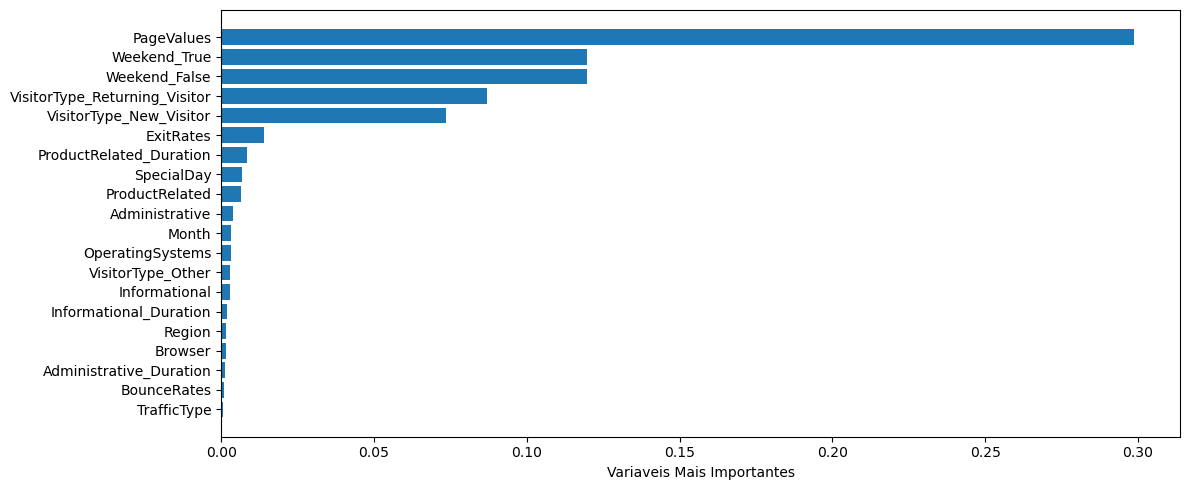

In [86]:
# Gerando um gráfico das variáveis mais importantes
perm_importance = permutation_importance(modelo_v3, X_teste_padronizados, Y_teste)

variaveis_preditoras = PREDITORAS.columns
variaveis = np.array(variaveis_preditoras)


importancia = perm_importance.importances_mean.argsort()
plt.barh(variaveis_preditoras[importancia], perm_importance.importances_mean[importancia])
plt.xlabel("Variaveis Mais Importantes")
plt.show()